In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from numpy import savetxt
import pandas as pd
import datetime 
import calendar
import random
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

#matplotlib and Seaborn
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(130086, 29)


,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,5/19/2014,ST_S0,1,16.175222,78.403833,MS_S0,F,0.0,0.0,1.0,...,2,0,3,0,0,0,0,0,0,0
1,5/17/2014,ST_S0,1,15.931554,70.989733,MS_S1,F,0.0,6.0,0.0,...,0,3,3,0,0,0,0,0,0,0
2,5/15/2014,ST_S0,1,15.937029,87.578371,MS_S2,M,0.0,0.0,10.0,...,0,0,6,0,0,0,0,0,0,0
3,5/16/2014,ST_S1,1,15.934292,68.438056,MS_S2,M,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,5/20/2014,ST_S0,1,15.501711,80.514716,MS_S0,F,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [3]:
df['Day_of_Week'] = pd.to_datetime(df['DATE_FOR']).dt.day_name()

In [4]:
print(df.isnull().sum())

df=df.apply(lambda x:x.fillna(x.value_counts().index[0]))

print(df.isnull().sum())

DATE_FOR                   0
RTD_ST_CD                  0
CustomerSegment            0
Tenure                     0
Age                        0
MART_STATUS                0
GENDER                     0
CHANNEL1_6M              809
CHANNEL2_6M              809
CHANNEL3_6M              809
CHANNEL4_6M              809
CHANNEL5_6M              809
METHOD1_6M               809
RECENT_PAYMENT           809
PAYMENTS_6M              809
CHANNEL1_3M                0
CHANNEL2_3M                0
CHANNEL3_3M                0
CHANNEL4_3M                0
CHANNEL5_3M                0
METHOD1_3M                 0
PAYMENTS_3M                0
NOT_DI_3M                  0
NOT_DI_6M                  0
EVENT1_30_FLAG             0
EVENT2_90_SUM              0
LOGINS                     0
POLICYPURCHASECHANNEL      0
Call_Flag                  0
Day_of_Week                0
dtype: int64
DATE_FOR                 0
RTD_ST_CD                0
CustomerSegment          0
Tenure                   0
Age      

In [5]:
print(df.columns)

Index(['DATE_FOR', 'RTD_ST_CD', 'CustomerSegment', 'Tenure', 'Age',
       'MART_STATUS', 'GENDER', 'CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M',
       'CHANNEL4_6M', 'CHANNEL5_6M', 'METHOD1_6M', 'RECENT_PAYMENT',
       'PAYMENTS_6M', 'CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M',
       'CHANNEL4_3M', 'CHANNEL5_3M', 'METHOD1_3M', 'PAYMENTS_3M', 'NOT_DI_3M',
       'NOT_DI_6M', 'EVENT1_30_FLAG', 'EVENT2_90_SUM', 'LOGINS',
       'POLICYPURCHASECHANNEL', 'Call_Flag', 'Day_of_Week'],
      dtype='object')


In [6]:
cat_cols =  ['DATE_FOR','RTD_ST_CD','CustomerSegment','MART_STATUS','GENDER','RECENT_PAYMENT','NOT_DI_3M','NOT_DI_6M', 'EVENT1_30_FLAG',
 'POLICYPURCHASECHANNEL','Day_of_Week']

In [7]:
df[cat_cols].isnull().sum()
print(df[cat_cols].apply(lambda x: x.value_counts()).T.stack())

DATE_FOR     5/13/2014    15254.0
             5/14/2014    16884.0
             5/15/2014    16624.0
             5/16/2014    16570.0
             5/17/2014    16053.0
                           ...   
Day_of_Week  Saturday     16053.0
             Sunday       17002.0
             Thursday     16624.0
             Tuesday      30249.0
             Wednesday    16884.0
Length: 86, dtype: float64


In [8]:
df = df.drop(['EVENT1_30_FLAG'], axis=1)
cat_cols.remove('EVENT1_30_FLAG')

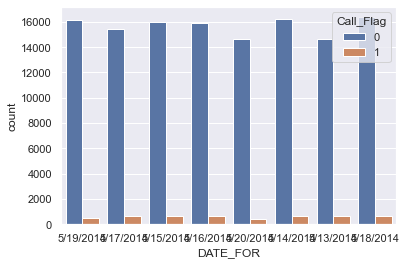

In [9]:
sns.set(style="darkgrid")
ax = sns.countplot(x="DATE_FOR",  hue="Call_Flag",data=df)

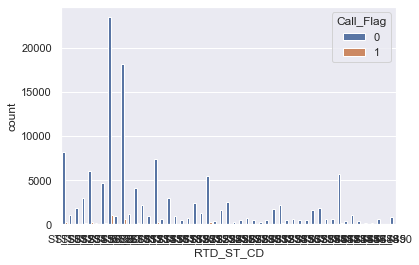

In [10]:
sns.set(style="darkgrid")
ax = sns.countplot(x="RTD_ST_CD",  hue="Call_Flag",data=df)

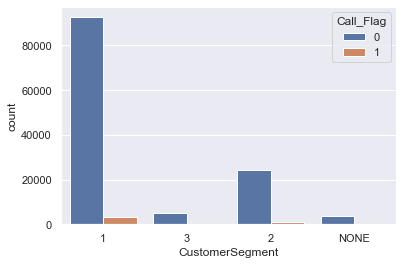

In [11]:
sns.set(style="darkgrid")
ax = sns.countplot(x="CustomerSegment",  hue="Call_Flag",data=df)

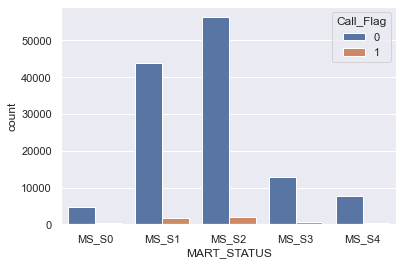

In [12]:
sns.set(style="darkgrid")
ax = sns.countplot(x="MART_STATUS",  hue="Call_Flag",data=df)

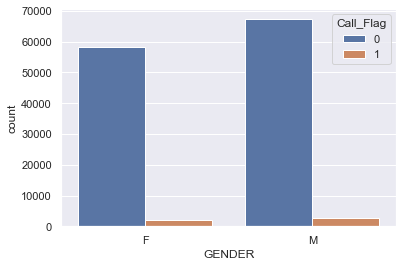

In [13]:
sns.set(style="darkgrid")
ax = sns.countplot(x="GENDER",  hue="Call_Flag",data=df)

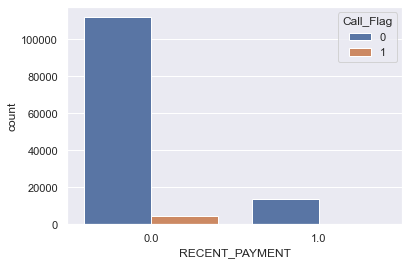

In [14]:
sns.set(style="darkgrid")
ax = sns.countplot(x="RECENT_PAYMENT",  hue="Call_Flag",data=df)

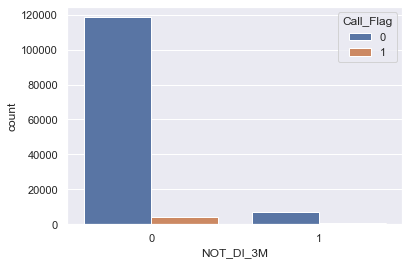

In [15]:
sns.set(style="darkgrid")
ax = sns.countplot(x="NOT_DI_3M",  hue="Call_Flag",data=df)

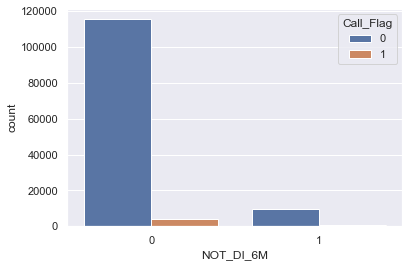

In [16]:
sns.set(style="darkgrid")
ax = sns.countplot(x="NOT_DI_6M",  hue="Call_Flag",data=df)

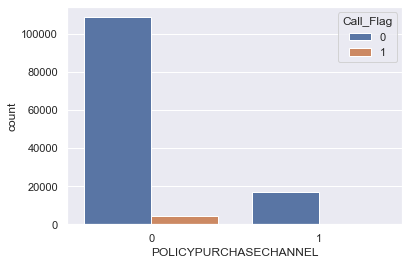

In [17]:
sns.set(style="darkgrid")
ax = sns.countplot(x="POLICYPURCHASECHANNEL",  hue="Call_Flag",data=df)

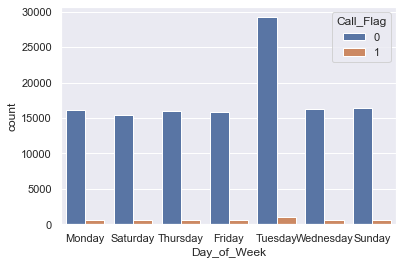

In [18]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Day_of_Week",  hue="Call_Flag",data=df)

In [19]:
df_final = pd.get_dummies(df, columns=cat_cols)

In [20]:
print(df_final.columns)
print(df_final.shape)

Index(['Tenure', 'Age', 'CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M',
       'CHANNEL4_6M', 'CHANNEL5_6M', 'METHOD1_6M', 'PAYMENTS_6M',
       'CHANNEL1_3M',
       ...
       'NOT_DI_6M_1', 'POLICYPURCHASECHANNEL_0', 'POLICYPURCHASECHANNEL_1',
       'Day_of_Week_Friday', 'Day_of_Week_Monday', 'Day_of_Week_Saturday',
       'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday',
       'Day_of_Week_Wednesday'],
      dtype='object', length=104)
(130086, 104)


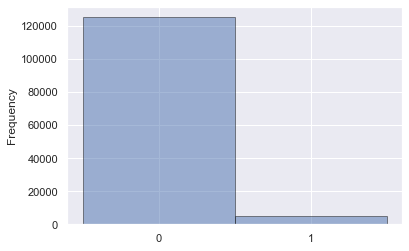

In [21]:
df_final.Call_Flag.plot(kind='hist',bins=[-.5,.5,1.5], ec="k", alpha=0.5)
plt.xticks((0,1))
plt.show()

In [22]:
random.seed(42)
train, test = train_test_split(df_final, test_size=0.20, stratify=df_final['Call_Flag']) 

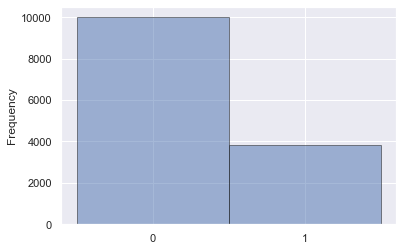

In [23]:
train_majority = train[train["Call_Flag"] == 0]
train_minority = train[train["Call_Flag"] == 1]
train_majority_downsampled = resample(train_majority, 
                                 replace=False,     
                                 n_samples=10000,    
                                 random_state=42) 
df_train = pd.concat([train_minority, train_majority_downsampled])


df_train.Call_Flag.plot(kind='hist',bins=[-.5,.5,1.5], ec="k", alpha=0.5)
plt.xticks((0,1))
plt.show()

In [24]:
X = df_train.drop(['Call_Flag'], axis=1)
y = df_train['Call_Flag'].values

In [25]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 8, 9, 10, 15],
        'learning_rate':[0.001,0.01,0.1,0.2,0.5,0.9],
        'n_estimators':[50,100,200,300,400,500,600,700,800,900,1000]
        }

In [26]:
xgb = XGBClassifier(objective='binary:logistic',silent=True, nthread=8)

In [27]:
folds = 5
param_comb = 10


skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)


random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=8, cv=skf.split(X, y), verbose=3, random_state=42 )


random_search.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:   48.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:  1.8min finished


[21:02:26] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:02:26] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000194F0EA2970>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           mi...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_jobs=8,
                   param_distributions={'colsample_bytree': [0.6

In [28]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results.csv', index=False)


 All results:
{'mean_fit_time': array([40.89843955,  0.55684266,  4.05574536, 77.09285169,  4.59020548,
       12.16251831,  0.99253311,  8.86268487,  7.42659755,  4.42431974]), 'std_fit_time': array([0.36648955, 0.01489102, 0.13341643, 8.86756684, 0.18530732,
       0.21848756, 0.06898026, 0.68468585, 0.23941821, 0.91499188]), 'mean_score_time': array([0.02882414, 0.0073915 , 0.00897617, 0.03829255, 0.01356363,
       0.0111702 , 0.00748124, 0.01047354, 0.009973  , 0.00757971]), 'std_score_time': array([0.00351813, 0.00048614, 0.00126162, 0.00876609, 0.00249139,
       0.00116315, 0.00140965, 0.00077236, 0.00126267, 0.00079752]), 'param_subsample': masked_array(data=[0.6, 1.0, 0.8, 0.8, 0.6, 0.8, 1.0, 0.6, 1.0, 0.6],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[700, 50, 200, 900, 100, 300, 100, 600, 100, 50],
             mask=[Fal

In [29]:
X_test = test.drop(['Call_Flag'], axis=1)
y_test = test['Call_Flag'].values

In [30]:
y_predict = random_search.predict(X_test)
y_predict_probs = random_search.predict_proba(X_test)

In [31]:
target_names = ['0', '1']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     25065
           1       0.21      0.55      0.30       953

    accuracy                           0.91     26018
   macro avg       0.59      0.74      0.62     26018
weighted avg       0.95      0.91      0.93     26018



In [32]:
from sklearn.metrics import roc_auc_score

roc_value = roc_auc_score(y_test, y_predict_probs[:, 1])
roc_value

0.8689802316704793

In [33]:
mlFinal = np.column_stack((y_predict, y_test))
from numpy import savetxt
savetxt('mlFinal_XGB_linearRegression.csv', mlFinal, delimiter=',')